<a href="https://colab.research.google.com/github/sidhu2690/IDC-410/blob/main/MLP_assignment_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!unzip data.zip

Archive:  data.zip
replace mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
def load_data(file_path):
    x_data = []
    y_data = []

    with open(file_path, 'r') as file:
        next(file)
        for line in file:
            values = line.strip().split(',')
            label = float(values[0])
            image = [float(val) / 255.0 for val in values[1:]]
            y_data.append(label)
            x_data.append(image)
    x = np.array(x_data)
    y = np.array(y_data)
    return x, y

In [ ]:
X,Y = load_data('/content/mnist_train.csv')
print("X shape:", X.shape)
print("y shape:", Y.shape)

X shape: (60000, 784)
y shape: (60000,)


The number is 0


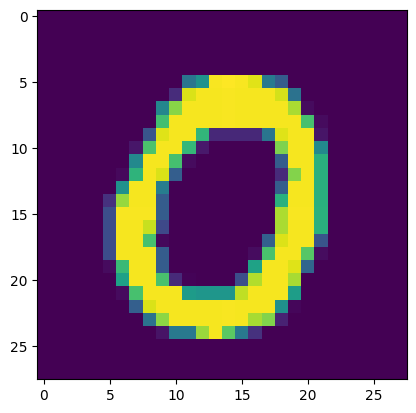

In [ ]:
i=np.random.randint(1,60000)
plt.imshow(X[i].reshape(28,28))
print(f"The number is {int(Y[i])}")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, output_size):
    W = np.random.randn(input_size, output_size) / np.sqrt(input_size)
    b = np.zeros((1, output_size))
    return W, b

def forward_pass(X, W, b):
    Z = np.dot(X, W) + b
    return Z, softmax(Z)

def backward_pass(X, y, Z, A, W, b, learning_rate):
    m = X.shape[0]

    dZ = A - y
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ, axis=0, keepdims=True) / m

    W -= learning_rate * dW
    b -= learning_rate * db

    return W, b

def train_model(X, y, num_classes, learning_rate, epochs):
    input_size = X.shape[1]
    W, b = initialize_parameters(input_size, num_classes)

    for epoch in range(epochs):
        Z, A = forward_pass(X, W, b)
        W, b = backward_pass(X, y, Z, A, W, b, learning_rate)

        if epoch % 50 == 0:
            loss = -np.mean(np.log(A[np.arange(len(y)), np.argmax(y, axis=1)]))
            print(f'Epoch {epoch}, Loss: {loss}')

    return W, b

One-hot encoding

In [ ]:
y_train = y_train.astype(np.int64)
y_train_one_hot = np.zeros((y_train.size, 10))
y_train_one_hot[np.arange(y_train.size), y_train] = 1
y_test = y_test.astype(np.int64)
y_one_hot_1 = np.zeros((y_test.size, 10))
y_one_hot_1[np.arange(y_test.size), y_test] = 1

In [ ]:
learning_rate = 0.001
epochs = 250
num_classes = 10

# Train the model
W, b = train_model(x_train, y_train_one_hot, num_classes, learning_rate, epochs)

Epoch 0, Loss: 2.325209765387293
Epoch 50, Loss: 1.8600461516365303
Epoch 100, Loss: 1.5609887469215382
Epoch 150, Loss: 1.3517451656164472
Epoch 200, Loss: 1.2020076437757354


In [ ]:
def predict(X, W, b):
    _, A = forward_pass(X, W, b)
    return np.argmax(A, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_pred = predict(x_test, W, b)
y_true = np.argmax(y_one_hot_1, axis=1)
acc = accuracy(y_true, y_pred)
print("Accuracy:", acc*100)

Accuracy: 80.325


predicted number [2]


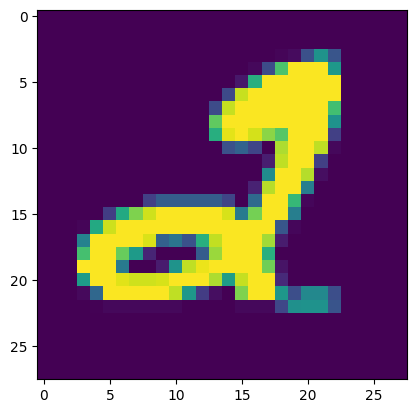

In [ ]:
i=np.random.randint(1,12000)
print(f"predicted number",predict(x_test[i],W,b))
plt.imshow(x_test[i].reshape(28,28))

3

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)       #sigmoid activation
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_pass(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate):
    m = X.shape[0]

    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 * (1 - A1))
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
    total_samples = y_true.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy

def train_model(X, y, hidden_size, num_classes, learning_rate, epochs):
    input_size = X.shape[1]
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, num_classes)

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)
        W1, b1, W2, b2 = backward_pass(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)

        if epoch % 10 == 0:
            loss = -np.mean(np.log(A2[np.arange(len(y)), np.argmax(y, axis=1)]))
            accuracy = calculate_accuracy(y, A2)
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}')

    return W1, b1, W2, b2


hidden_size = 10
num_classes = 10
learning_rate = 0.001
epochs = 100
trained_parameters = train_model(x_train, y_train_one_hot, hidden_size, num_classes, learning_rate, epochs)

Epoch 0, Loss: 2.3954378623965042, Accuracy: 0.08402083333333334
Epoch 10, Loss: 2.2162501531174508, Accuracy: 0.21095833333333333
Epoch 20, Loss: 2.129585304954302, Accuracy: 0.3697916666666667
Epoch 30, Loss: 2.050401596886019, Accuracy: 0.43533333333333335
Epoch 40, Loss: 1.9738065876188922, Accuracy: 0.48945833333333333
Epoch 50, Loss: 1.8991502057834275, Accuracy: 0.53475
Epoch 60, Loss: 1.8262189933222528, Accuracy: 0.5710416666666667
Epoch 70, Loss: 1.7552097471115369, Accuracy: 0.5993958333333333
Epoch 80, Loss: 1.6865645709135284, Accuracy: 0.6246041666666666
Epoch 90, Loss: 1.6207314907822847, Accuracy: 0.6463958333333333


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):
    W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate):
    m = X.shape[0]

    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * (A2 * (1 - A2))
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 * (1 - A1))
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3

def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
    total_samples = y_true.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy

def train_model(X, y, hidden_size1, hidden_size2, num_classes, learning_rate, epochs):
    input_size = X.shape[1]
    W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden_size1, hidden_size2, num_classes)

    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_pass(X, W1, b1, W2, b2, W3, b3)
        W1, b1, W2, b2, W3, b3 = backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate)

        if epoch % 10 == 0:
            loss = -np.mean(np.log(A3[np.arange(len(y)), np.argmax(y, axis=1)]))
            accuracy = calculate_accuracy(y, A3)
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}')

    return W1, b1, W2, b2, W3, b3

hidden_size1 = 10
hidden_size2 = 10
num_classes = 10
learning_rate = 0.001
epochs = 100
trained_parameters = train_model(x_train, y_train_one_hot, hidden_size1, hidden_size2, num_classes, learning_rate, epochs)


Epoch 0, Loss: 2.4447408933519603, Accuracy: 0.09045833333333334
Epoch 10, Loss: 2.3019210186183474, Accuracy: 0.1455
Epoch 20, Loss: 2.28233735194819, Accuracy: 0.12633333333333333
Epoch 30, Loss: 2.271423046123819, Accuracy: 0.16110416666666666
Epoch 40, Loss: 2.260333745352481, Accuracy: 0.22995833333333332
Epoch 50, Loss: 2.2478737279791146, Accuracy: 0.2992708333333333
Epoch 60, Loss: 2.2336158149919196, Accuracy: 0.36052083333333335
Epoch 70, Loss: 2.217205314509312, Accuracy: 0.40475
Epoch 80, Loss: 2.198273503894581, Accuracy: 0.4289375
Epoch 90, Loss: 2.17644363916371, Accuracy: 0.4415


### 1 Hidden layer with ReLu

In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_pass(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate):
    m = X.shape[0]

    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
    total_samples = y_true.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy

def train_model(X, y, hidden_size, num_classes, learning_rate, epochs):
    input_size = X.shape[1]
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, num_classes)

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)
        W1, b1, W2, b2 = backward_pass(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)

        if epoch % 10 == 0:
            loss = -np.mean(np.log(A2[np.arange(len(y)), np.argmax(y, axis=1)]))
            accuracy = calculate_accuracy(y, A2)
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy*100}')

    return W1, b1, W2, b2


hidden_size = 10
num_classes = 10
learning_rate = 0.001
epochs = 200
trained_parameters = train_model(x_train, y_train_one_hot, hidden_size, num_classes, learning_rate, epochs)


Epoch 0, Loss: 2.310338137763086, Accuracy: 7.88125
Epoch 10, Loss: 1.947530267387898, Accuracy: 38.514583333333334
Epoch 20, Loss: 1.5908829820590873, Accuracy: 52.43333333333333
Epoch 30, Loss: 1.3154980462562567, Accuracy: 63.5
Epoch 40, Loss: 1.109542023659461, Accuracy: 72.78958333333333
Epoch 50, Loss: 0.9556980844574191, Accuracy: 77.25208333333333
Epoch 60, Loss: 0.8412411728273637, Accuracy: 79.54791666666667
Epoch 70, Loss: 0.7577206846012914, Accuracy: 81.26875
Epoch 80, Loss: 0.6955566260823677, Accuracy: 82.51041666666666
Epoch 90, Loss: 0.6478550874518055, Accuracy: 83.55416666666666
Epoch 100, Loss: 0.6101884864418082, Accuracy: 84.35000000000001
Epoch 110, Loss: 0.5796813823143224, Accuracy: 84.98333333333333
Epoch 120, Loss: 0.5544433036093293, Accuracy: 85.53333333333333
Epoch 130, Loss: 0.5331846892343701, Accuracy: 85.96041666666666
Epoch 140, Loss: 0.5150265969082579, Accuracy: 86.33541666666666
Epoch 150, Loss: 0.49931494431882373, Accuracy: 86.69583333333334
Epoc

### 2 Hidden layer with ReLu

In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):
    W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate):
    m = X.shape[0]

    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * (Z2 > 0)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    return W1, b1, W2, b2, W3, b3

def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
    total_samples = y_true.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy

def train_model(X, y, hidden_size1, hidden_size2, num_classes, learning_rate, epochs):
    input_size = X.shape[1]
    W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden_size1, hidden_size2, num_classes)

    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_pass(X, W1, b1, W2, b2, W3, b3)
        W1, b1, W2, b2, W3, b3 = backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate)

        if epoch % 10 == 0:
            loss = -np.mean(np.log(A3[np.arange(len(y)), np.argmax(y, axis=1)]))
            accuracy = calculate_accuracy(y, A3)
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy*100}')

    return W1, b1, W2, b2, W3, b3

hidden_size1 = 10
hidden_size2 = 10
num_classes = 10
learning_rate = 0.001
epochs = 200

trained_parameters = train_model(x_train, y_train_one_hot, hidden_size1, hidden_size2, num_classes, learning_rate, epochs)


Epoch 0, Loss: 2.381043203225201, Accuracy: 10.172916666666666
Epoch 10, Loss: 2.1670522147433906, Accuracy: 14.620833333333334
Epoch 20, Loss: 2.0021441112649088, Accuracy: 21.7
Epoch 30, Loss: 1.8465779712115598, Accuracy: 37.56666666666666
Epoch 40, Loss: 1.663747959694357, Accuracy: 47.989583333333336
Epoch 50, Loss: 1.452319581998155, Accuracy: 55.21458333333334
Epoch 60, Loss: 1.2435914087487896, Accuracy: 62.02916666666667
Epoch 70, Loss: 1.077550590885921, Accuracy: 68.3125
Epoch 80, Loss: 0.9607229879989333, Accuracy: 71.28750000000001
Epoch 90, Loss: 0.8783030003618892, Accuracy: 73.20625
Epoch 100, Loss: 0.8171438895245101, Accuracy: 74.81666666666666
Epoch 110, Loss: 0.7687012137310532, Accuracy: 76.27083333333333
Epoch 120, Loss: 0.7284946387942346, Accuracy: 77.6625
Epoch 130, Loss: 0.7088022085998301, Accuracy: 78.21249999999999
Epoch 140, Loss: 0.79210319947216, Accuracy: 74.00625
Epoch 150, Loss: 0.6417680648088961, Accuracy: 80.52916666666667
Epoch 160, Loss: 0.614231

#V
#### gd with momentum

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):
    W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

def forward_pass(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate, momentum):
    m = X.shape[0]

    dZ3 = A3 - y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * (Z2 > 0)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Momentum
    if 'VdW1' not in globals():
        VdW1 = np.zeros_like(W1)
        Vdb1 = np.zeros_like(b1)
        VdW2 = np.zeros_like(W2)
        Vdb2 = np.zeros_like(b2)
        VdW3 = np.zeros_like(W3)
        Vdb3 = np.zeros_like(b3)

    VdW3 = momentum * VdW3 - learning_rate * dW3
    Vdb3 = momentum * Vdb3 - learning_rate * db3
    VdW2 = momentum * VdW2 - learning_rate * dW2
    Vdb2 = momentum * Vdb2 - learning_rate * db2
    VdW1 = momentum * VdW1 - learning_rate * dW1
    Vdb1 = momentum * Vdb1 - learning_rate * db1

    W1 += VdW1
    b1 += Vdb1
    W2 += VdW2
    b2 += Vdb2
    W3 += VdW3
    b3 += Vdb3

    return W1, b1, W2, b2, W3, b3

def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
    total_samples = y_true.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy

def train_model(X, y, hidden_size1, hidden_size2, num_classes, learning_rate, epochs, momentum):
    input_size = X.shape[1]
    W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden_size1, hidden_size2, num_classes)

    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward_pass(X, W1, b1, W2, b2, W3, b3)
        W1, b1, W2, b2, W3, b3 = backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate, momentum)

        if epoch % 10 == 0:
            loss = -np.mean(np.log(A3[np.arange(len(y)), np.argmax(y, axis=1)]))
            accuracy = calculate_accuracy(y, A3)
            print(f'Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy*100}')

    return W1, b1, W2, b2, W3, b3

hidden_size1 = 10
hidden_size2 = 10
num_classes = 10
learning_rate = 0.001
epochs = 200
momentum = 0.1

trained_parameters = train_model(x_train, y_train_one_hot, hidden_size1, hidden_size2, num_classes, learning_rate, epochs, momentum)

Epoch 0, Loss: 2.299345247253505, Accuracy: 11.295833333333333
Epoch 10, Loss: 2.2041144772190036, Accuracy: 24.058333333333334
Epoch 20, Loss: 2.0822070048887173, Accuracy: 27.89375
Epoch 30, Loss: 1.93622853233075, Accuracy: 31.683333333333337
Epoch 40, Loss: 1.7794096321497563, Accuracy: 36.27708333333333
Epoch 50, Loss: 1.6224318227354424, Accuracy: 42.4875
Epoch 60, Loss: 1.4656017612105061, Accuracy: 49.27708333333333
Epoch 70, Loss: 1.3107360647779496, Accuracy: 62.33541666666667
Epoch 80, Loss: 1.1749825925874533, Accuracy: 67.39375
Epoch 90, Loss: 1.063348717418282, Accuracy: 69.69375
Epoch 100, Loss: 0.9712084603696991, Accuracy: 71.8
Epoch 110, Loss: 0.8944768195182846, Accuracy: 73.81875
Epoch 120, Loss: 1.0728235699854982, Accuracy: 62.391666666666666
Epoch 130, Loss: 0.7987141848615595, Accuracy: 76.61875
Epoch 140, Loss: 0.7318648430054, Accuracy: 79.01041666666667
Epoch 150, Loss: 0.6919904892343345, Accuracy: 80.45833333333333
Epoch 160, Loss: 0.661829377760372, Accura